In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools
from scipy.optimize import curve_fit


In [3]:
def linear (x, a, b):
    return a*x+b

In [4]:
datanickel = tools.data("../data/voltagenickel.csv")
dataLSMO = tools.data("../data/sample3voltageLSMO.csv")
datagd = tools.data("../data/voltagesamplegd2o3.csv")
datagdbg = tools.data("../data/voltagebggd2o3.csv")

array_ni = datanickel.arrays
array_ls = dataLSMO.arrays
array_gd = datagd.arrays
array_gdbg = datagdbg.arrays

In [5]:

array_ls[0].T[0]

array([0.5, 0.5, 0.5, ..., 4.5, 4.5, 4.5])

In [6]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 12})
plt.rcParams.update({'font.family': 'Helvetica'})

nickel slope  [ 5.62822393e-04 -1.98748124e-06]
LSMO slope  [ 5.23115219e-04 -8.95375327e-07]
Gd2O3 slope  [2.99442997e-04 1.10316490e-06]
background slope  [2.97732056e-04 1.14280013e-06]


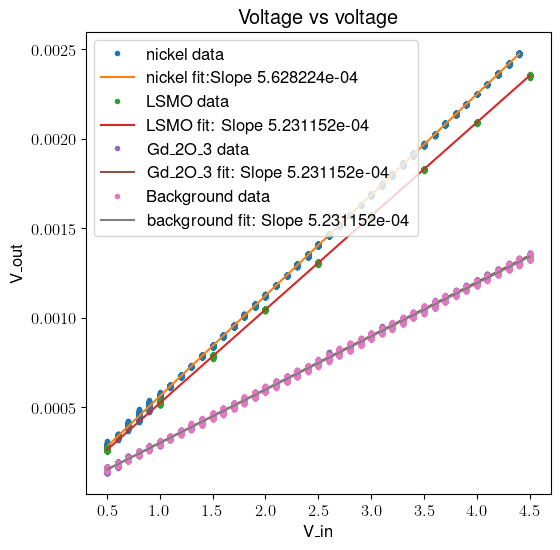

In [7]:

fig, ax = plt.subplots(figsize=(6,6))

fit_ni, cov_ni = curve_fit(linear, array_ni[0].T[0], array_ni[3].T[0])
print("nickel slope ", fit_ni)
fit_ls, cov_ls = curve_fit(linear, array_ls[0].T[0], array_ls[3].T[0])
print("LSMO slope ", fit_ls)
fit_gd, cov_gd = curve_fit(linear, array_gd[0].T[0], array_gd[3].T[0])
print("Gd2O3 slope ", fit_gd)
fit_gdbg, cov_gdbg = curve_fit(linear, array_gdbg[0].T[0], array_gdbg[3].T[0])
print("background slope ", fit_gdbg)
ax.plot(array_ni[0], array_ni[3], 'o',markersize=3, label="nickel data")
ax.plot(array_ni[0], array_ni[0]*fit_ni[0]+fit_ni[1], label= "nickel fit:Slope "+ '{:e}'.format(fit_ni[0]))
ax.plot(array_ls[0], array_ls[3],'o',markersize=3, label= "LSMO data")
ax.plot(array_ls[0], array_ls[0]*fit_ls[0]+fit_ls[1], label= "LSMO fit: Slope "+'{:e}'.format(fit_ls[0]))

ax.plot(array_gd[0], array_gd[3],'o',markersize=3, label= "Gd_2O_3 data")
ax.plot(array_gd[0], array_gd[0]*fit_gd[0]+fit_gd[1], label= "Gd_2O_3 fit: Slope "+'{:e}'.format(fit_ls[0]))
ax.plot(array_gdbg[0], array_gdbg[3],'o',markersize=3, label= "Background data")
ax.plot(array_gdbg[0], array_gdbg[0]*fit_gdbg[0]+fit_gdbg[1], label= "background fit: Slope "+'{:e}'.format(fit_ls[0]))

ax.set_xlabel(r"V_{in}")
ax.set_ylabel(r"V_{out}")
ax.set_title("Voltage vs voltage")
ax.legend()
fig.savefig("voltage.png", dpi=600,bbox_inches='tight')
